In [129]:
from datasets import load_from_disk

In [148]:
ds = load_from_disk('../data/processed/dataset')

In [149]:
ds

DatasetDict({
    train: Dataset({
        features: ['question', 'ground_truth', 'page', 'document'],
        num_rows: 1423
    })
    test: Dataset({
        features: ['question', 'ground_truth', 'page', 'document'],
        num_rows: 306
    })
    val: Dataset({
        features: ['question', 'ground_truth', 'page', 'document'],
        num_rows: 305
    })
})

In [150]:
ds['train'][0]

{'question': 'Was könnte ein Zweck dieses Diagramms sein?',
 'ground_truth': 'Überwachung und Qualitätssicherung der Crimp-Kontaktierung',
 'page': 8,
 'document': 'GS 95006-7-5 Kfz-Kontaktierungen Überwachungskriterien von Crimp-1'}

In [151]:
ds['train'][1]

{'question': 'Mit welchem Mantelmaterial werden LEONI Adascart® Sensor ungeschirmt oder geschirmt Kabel ausgestattet, um eine Betriebstemperatur von +150 °C zu unterstützen?',
 'ground_truth': 'TPE-U oder TPE-A/TPE-E',
 'page': 69,
 'document': 'leoni_fahrzeugleitungen'}

In [6]:
!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [ ]:
all_questions = ' '.join(ds['train']['question']) + ' ' + \
                ' '.join(ds['test']['question']) + ' ' + \
                ' '.join(ds['val']['question'])

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dmitriimaksimov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords

german_stop_words = stopwords.words('german')

In [53]:
wordcloud = WordCloud(width=800, height=400, max_font_size=50, stopwords=german_stop_words, background_color="white").generate(all_questions)

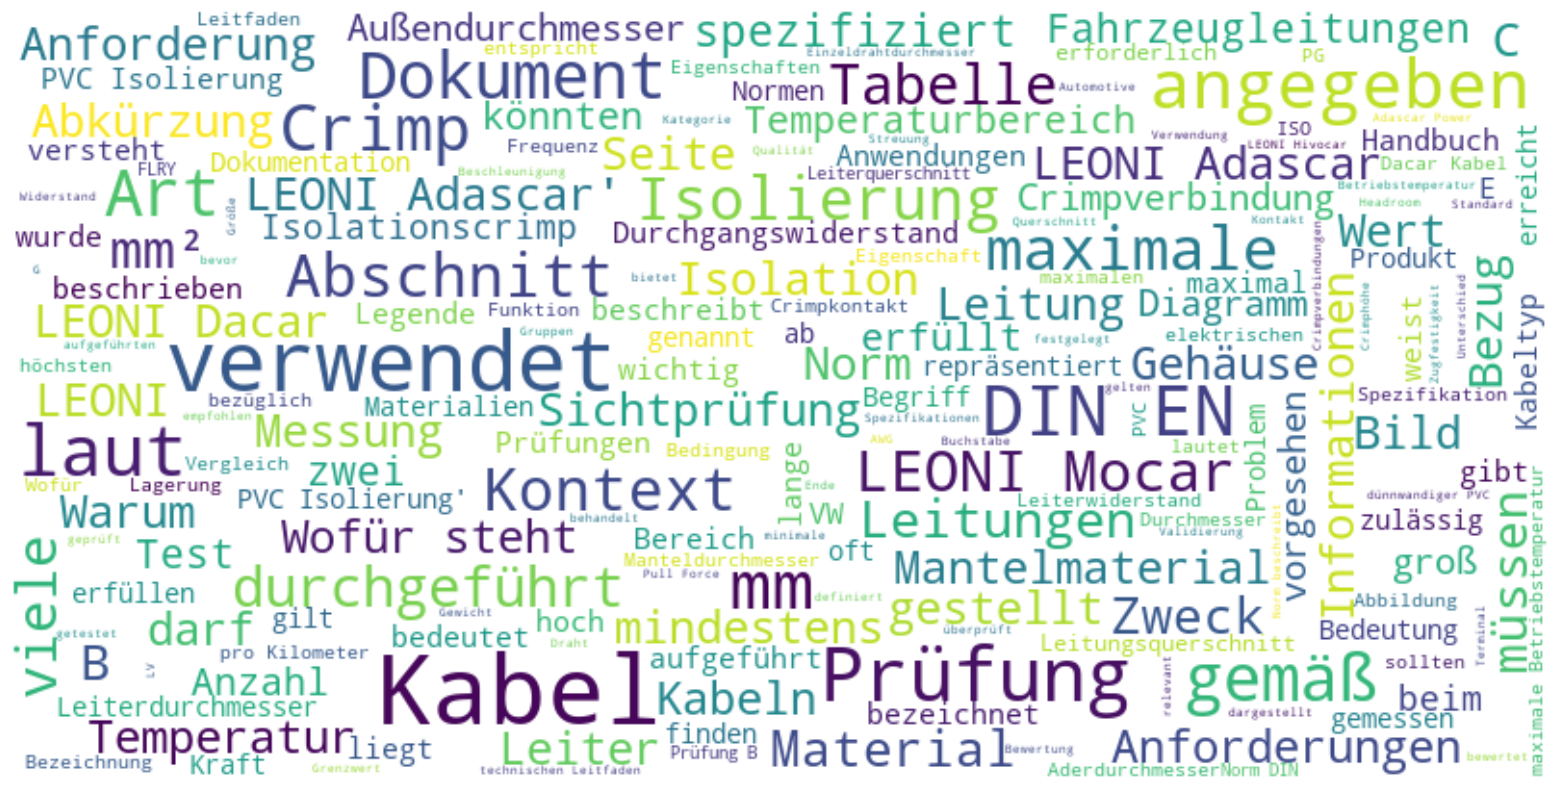

In [55]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [152]:
from aim import Repo

my_repo = Repo('../')

query = "run.hash in ['b1451d958663490192e7766e','fde35404a96b4c93b2211dbe','b9c7698e3fb34f02b08d0cfe','b5a2f469d1d641af8ce16088','791c41a8cfda4938baeaa596']" # Example query

In [153]:
metrics = my_repo.query_metrics(query)

In [154]:
metrics = metrics.dataframe()

100%|██████████| 30/30 [00:00<00:00, 208.43it/s]


In [155]:
metrics

,idx,step,value,epoch,time,run.hash,run.hparams.bucket_name,run.hparams.evaluator_model,run.hparams.input,run.hparams.max_new_tokens,run.hparams.model,run.hparams.output,run.hparams.sagemaker_instance,run.hparams.temperature,run.hparams.top_p,run.hparams.use_flash_attention_2,metric.name,metric.context.subset,metric.context
0,0,0,0.734208,NaN,2024-01-16 12:05:33.703423,791c41a8cfda4938baeaa596,tcr-internal,gpt-3.5-turbo-1106,dmitrii/results/retriever_predictions,250,TheBloke/Mixtral-8x7B-Instruct-v0.1-GPTQ,dmitrii/results/generator_predictions_mixtral,ml.g5.12xlarge,0.7,0.95,False,faithfulness,val,NaN
0,0,0,0.000000,NaN,2024-01-16 11:41:08.055555,791c41a8cfda4938baeaa596,tcr-internal,gpt-3.5-turbo-1106,dmitrii/results/retriever_predictions,250,TheBloke/Mixtral-8x7B-Instruct-v0.1-GPTQ,dmitrii/results/generator_predictions_mixtral,ml.g5.12xlarge,0.7,0.95,False,__system__cpu,NaN,<ObjectFlag>
1,1,1,1.300000,NaN,2024-01-16 11:41:18.427266,791c41a8cfda4938baeaa596,tcr-internal,gpt-3.5-turbo-1106,dmitrii/results/retriever_predictions,250,TheBloke/Mixtral-8x7B-Instruct-v0.1-GPTQ,dmitrii/results/generator_predictions_mixtral,ml.g5.12xlarge,0.7,0.95,False,__system__cpu,NaN,<ObjectFlag>
2,2,2,0.500000,NaN,2024-01-16 11:41:28.757001,791c41a8cfda4938baeaa596,tcr-internal,gpt-3.5-turbo-1106,dmitrii/results/retriever_predictions,250,TheBloke/Mixtral-8x7B-Instruct-v0.1-GPTQ,dmitrii/results/generator_predictions_mixtral,ml.g5.12xlarge,0.7,0.95,False,__system__cpu,NaN,<ObjectFlag>
3,3,3,0.400000,NaN,2024-01-16 11:41:39.054412,791c41a8cfda4938baeaa596,tcr-internal,gpt-3.5-turbo-1106,dmitrii/results/retriever_predictions,250,TheBloke/Mixtral-8x7B-Instruct-v0.1-GPTQ,dmitrii/results/generator_predictions_mixtral,ml.g5.12xlarge,0.7,0.95,False,__system__cpu,NaN,<ObjectFlag>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,142,142,1.643848,NaN,2024-01-06 20:53:25.353446,b9c7698e3fb34f02b08d0cfe,tcr-internal,gpt-3.5-turbo-1106,dmitrii/results/retriever_predictions,200,LeoLM/leo-mistral-hessianai-7b-chat,dmitrii/results/generator_predictions_mistral,ml.g5.2xlarge,0.7,0.00,NaN,__system__p_memory_percent,NaN,<ObjectFlag>
143,143,143,1.643515,NaN,2024-01-06 20:53:35.802335,b9c7698e3fb34f02b08d0cfe,tcr-internal,gpt-3.5-turbo-1106,dmitrii/results/retriever_predictions,200,LeoLM/leo-mistral-hessianai-7b-chat,dmitrii/results/generator_predictions_mistral,ml.g5.2xlarge,0.7,0.00,NaN,__system__p_memory_percent,NaN,<ObjectFlag>
144,144,144,1.643944,NaN,2024-01-06 20:53:46.293595,b9c7698e3fb34f02b08d0cfe,tcr-internal,gpt-3.5-turbo-1106,dmitrii/results/retriever_predictions,200,LeoLM/leo-mistral-hessianai-7b-chat,dmitrii/results/generator_predictions_mistral,ml.g5.2xlarge,0.7,0.00,NaN,__system__p_memory_percent,NaN,<ObjectFlag>
145,145,145,1.643944,NaN,2024-01-06 20:53:56.749468,b9c7698e3fb34f02b08d0cfe,tcr-internal,gpt-3.5-turbo-1106,dmitrii/results/retriever_predictions,200,LeoLM/leo-mistral-hessianai-7b-chat,dmitrii/results/generator_predictions_mistral,ml.g5.2xlarge,0.7,0.00,NaN,__system__p_memory_percent,NaN,<ObjectFlag>


In [156]:
# models = {
#     ''
# }

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
df = metrics.loc[metrics['metric.name'].isin(['faithfulness'])]

In [159]:
models = {
    'TheBloke/Mixtral-8x7B-Instruct-v0.1-GPTQ': 'Mixtral-8x7B-v0.1',
    'dmitrii/models/mistral_finetuned_completion_only': 'leo-mistral-hessianai-7b, prefix finetuned',
    'dmitrii/models/mistral_finetuned': 'leo-mistral-hessianai-7b, full finetuned',
    'TheBloke/leo-hessianai-70B-chat-AWQ': 'leo-hessianai-70B',
    'LeoLM/leo-mistral-hessianai-7b-chat': 'leo-mistral-hessianai-7b'
}

In [160]:
df['run.hparams.model'].replace(models, inplace=True)

/var/folders/r_/bq4swdms3vj5wr80yf1vm4nh0000gn/T/ipykernel_31270/2178354684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run.hparams.model'].replace(models, inplace=True)


In [161]:
df.loc[df['run.hparams.model'].eq('leo-mistral-hessianai-7b, prefix finetuned') & df['metric.name'].eq('faithfulness')]

,idx,step,value,epoch,time,run.hash,run.hparams.bucket_name,run.hparams.evaluator_model,run.hparams.input,run.hparams.max_new_tokens,run.hparams.model,run.hparams.output,run.hparams.sagemaker_instance,run.hparams.temperature,run.hparams.top_p,run.hparams.use_flash_attention_2,metric.name,metric.context.subset,metric.context
0,0,0,0.638064,NaN,2024-01-08 16:54:10.023383,b5a2f469d1d641af8ce16088,tcr-internal,gpt-3.5-turbo-1106,dmitrii/results/retriever_predictions,200,"leo-mistral-hessianai-7b, prefix finetuned",dmitrii/results/generator_predictions_mistral_...,ml.g5.2xlarge,0.7,0.0,False,faithfulness,val,NaN
0,0,0,0.670806,NaN,2024-01-08 17:09:03.039392,b5a2f469d1d641af8ce16088,tcr-internal,gpt-3.5-turbo-1106,dmitrii/results/retriever_predictions,200,"leo-mistral-hessianai-7b, prefix finetuned",dmitrii/results/generator_predictions_mistral_...,ml.g5.2xlarge,0.7,0.0,False,faithfulness,test,NaN


In [162]:
df['run.hparams.output'].unique()

array(['dmitrii/results/generator_predictions_mixtral',
       'dmitrii/results/generator_predictions_mistral_finetuned_completion_only',
       'dmitrii/results/generator_predictions_mistral_finetuned',
       'dmitrii/results/generator_predictions_llama',
       'dmitrii/results/generator_predictions_mistral'], dtype=object)

In [163]:
models = [
    ('dmitrii/results/generator_predictions_mixtral_no_tuned_retriever', 'Mixtral, non-finetuned|non-finetuned'),
    ('dmitrii/results/generator_predictions_mixtral_no_context', 'Mixtral, non-finetuned|without'),
    ('dmitrii/results/generator_predictions_mixtral', 'Mixtral, non-finetuned|finetuned'),
    ('dmitrii/results/generator_predictions_llama', 'Llama 2, non-finetuned|finetuned'),
    ('dmitrii/results/generator_predictions_mistral', 'Mistral, non-finetuned|finetuned'),
    ('dmitrii/results/generator_predictions_mistral_finetuned_completion_only', 'Mistral, full finetuned|finetuned'),
    ('dmitrii/results/generator_predictions_mistral_finetuned', 'Mistral, prefix finetuned|finetuned'),
          ]

In [19]:
from datasets.filesystems import S3FileSystem

In [20]:
datasets_len = {}
s3 = S3FileSystem(profile='tcr')
for i, row in df[['run.hparams.output', 'run.hparams.model']].drop_duplicates().iterrows():
    dataset = load_from_disk(f's3://tcr-internal/{row["run.hparams.output"]}', storage_options=s3.storage_options)
    lenngths = {}
    for split in ['val']:
        tokens = list(map(lambda x: x.split(), dataset[split]['answer']))
        lengths = sum(map(lambda x: len(x), tokens))
        lenngths[split] = lengths / len(dataset[split])
    datasets_len[row['run.hparams.model']] = lenngths

/Users/dmitriimaksimov/Desktop/GitHub/master_thesis_RAG_LLM/.venv/lib/python3.10/site-packages/fsspec/spec.py:79: FutureWarning: S3FileSystem is deprecated and will be removed in the next major version of datasets. Use s3fs.S3FileSystem instead.
  obj = super().__call__(*args, **kwargs)
/Users/dmitriimaksimov/Desktop/GitHub/master_thesis_RAG_LLM/.venv/lib/python3.10/site-packages/fsspec/registry.py:272: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


In [21]:
datasets_len

{'Mixtral-8x7B-v0.1': {'val': 55.27540983606557},
 'leo-mistral-hessianai-7b, prefix finetuned': {'val': 6.593442622950819},
 'leo-mistral-hessianai-7b, full finetuned': {'val': 8.072131147540984},
 'leo-hessianai-70B': {'val': 23.970491803278687},
 'leo-mistral-hessianai-7b': {'val': 35.649180327868855}}

In [22]:
datasets_len

{'Mixtral-8x7B-v0.1': {'val': 55.27540983606557},
 'leo-mistral-hessianai-7b, prefix finetuned': {'val': 6.593442622950819},
 'leo-mistral-hessianai-7b, full finetuned': {'val': 8.072131147540984},
 'leo-hessianai-70B': {'val': 23.970491803278687},
 'leo-mistral-hessianai-7b': {'val': 35.649180327868855}}

In [23]:
import pandas as pd
df_data = []
for model, performance in datasets_len.items():
    for subset, value in performance.items():
        df_data.append({'model': model, 'avg_answer_len': value, 'subset': subset})

df_data = pd.DataFrame(df_data)
df_data

,model,avg_answer_len,subset
0,Mixtral-8x7B-v0.1,55.275410,val
1,"leo-mistral-hessianai-7b, prefix finetuned",6.593443,val
2,"leo-mistral-hessianai-7b, full finetuned",8.072131,val
3,leo-hessianai-70B,23.970492,val
4,leo-mistral-hessianai-7b,35.649180,val


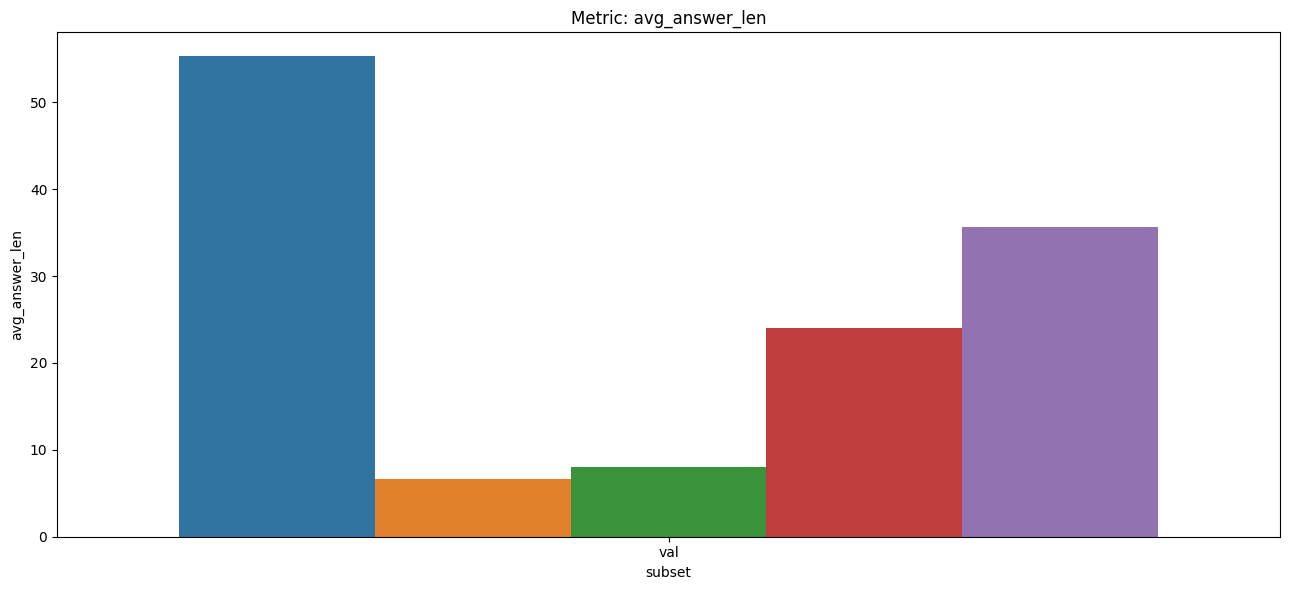

In [44]:
metrics = ['avg_answer_len']  # List of metrics
n_metrics = len(metrics)
plt.figure(figsize=(13, 6 * n_metrics))  # Adjust height based on number of metrics

for i, metric in enumerate(metrics, 1):
    ax = plt.subplot(n_metrics, 1, i)
    sns.barplot(
        data=df_data,
        x='subset',
        y=metric,
        hue='model',
        dodge=True,
        err_kws={'linewidth': 0}
    )
    plt.legend([],[], frameon=False)
    plt.title(f'Metric: {metric}')

plt.tight_layout()
plt.show()


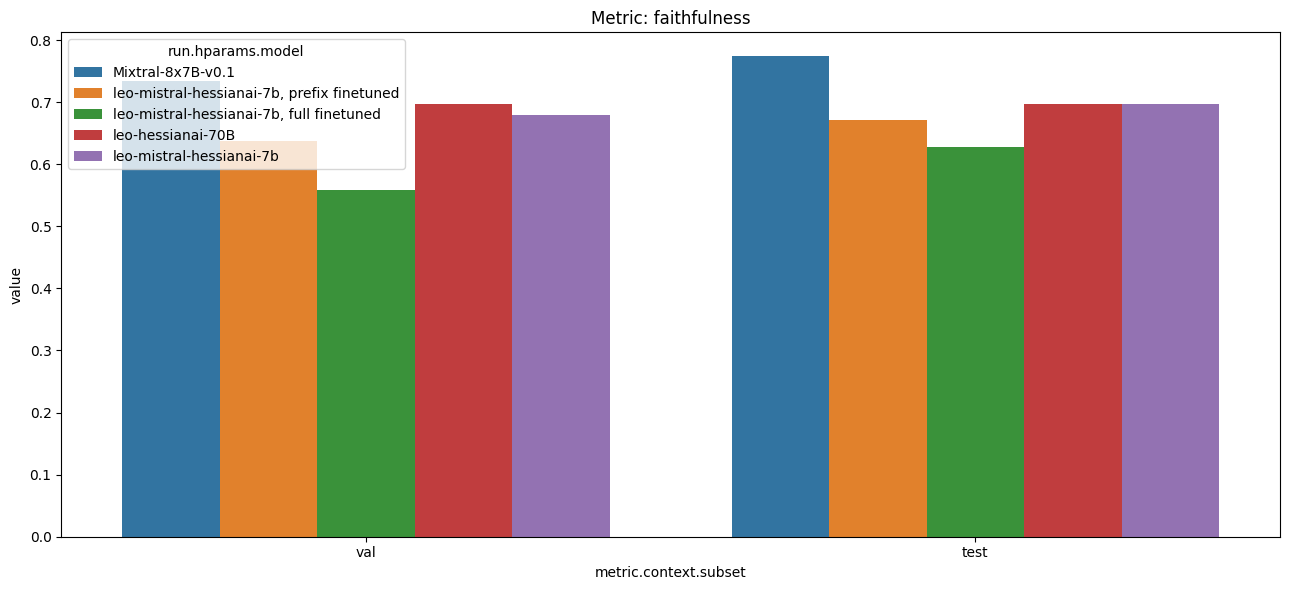

In [45]:
unique_metrics = df['metric.name'].unique()
n_metrics = len(unique_metrics)
plt.figure(figsize=(13, 6 * n_metrics))  # Adjust height based on number of metrics

for i, metric in enumerate(unique_metrics, 1):
    ax = plt.subplot(n_metrics, 1, i)
    subset = df[df['metric.name'] == metric]
    sns.barplot(
        data=subset,
        x='metric.context.subset',
        y='value',
        hue='run.hparams.model',
        dodge=True,
        err_kws={'linewidth': 0}
    )
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.title(f'Metric: {metric}')

plt.tight_layout()
plt.show()


In [135]:
import boto3
from datasets.filesystems import S3FileSystem


In [136]:
session = boto3.session.Session(profile_name='tcr')
s3_client = session.client('s3')

In [164]:
models = [
    ('dmitrii/results/generator_predictions_mixtral_no_tuned_retriever', 'Mixtral, non-finetuned|non-finetuned'),
    ('dmitrii/results/generator_predictions_mixtral_no_context', 'Mixtral, non-finetuned|without'),
    ('dmitrii/results/generator_predictions_mixtral', 'Mixtral, non-finetuned|finetuned'),
    ('dmitrii/results/generator_predictions_llama', 'Llama 2, non-finetuned|finetuned'),
    ('dmitrii/results/generator_predictions_mistral', 'Mistral, non-finetuned|finetuned'),
    ('dmitrii/results/generator_predictions_mistral_finetuned_completion_only', 'Mistral, full finetuned|finetuned'),
    ('dmitrii/results/generator_predictions_mistral_finetuned', 'Mistral, prefix finetuned|finetuned'),
          ]

In [166]:
datasets = {}
s3 = S3FileSystem(profile='tcr')
for path, model in models:
    datasets[model] = load_from_disk(f's3://tcr-internal/{path}', storage_options=s3.storage_options)

In [167]:
datasets

{'Mixtral, non-finetuned|non-finetuned': DatasetDict({
     train: Dataset({
         features: ['question', 'ground_truth', 'page', 'document', 'contexts', 'distances', 'contexts_pages', 'contexts_documents'],
         num_rows: 1423
     })
     test: Dataset({
         features: ['question', 'ground_truth', 'page', 'document', 'contexts', 'distances', 'contexts_pages', 'contexts_documents', 'answer', 'rouge1_recall', 'rouge2_recall', 'rougeL_recall', 'answer_correctness'],
         num_rows: 306
     })
     val: Dataset({
         features: ['question', 'ground_truth', 'page', 'document', 'contexts', 'distances', 'contexts_pages', 'contexts_documents', 'answer', 'rouge1_recall', 'rouge2_recall', 'rougeL_recall', 'answer_correctness'],
         num_rows: 305
     })
 }),
 'Mixtral, non-finetuned|without': DatasetDict({
     train: Dataset({
         features: ['question', 'ground_truth', 'page', 'document', 'contexts', 'distances', 'contexts_pages', 'contexts_documents'],
         n

In [193]:
import numpy as np
max_var = {
    'i': -1,
    'var': -1
}
min_var = {
    'i': -1,
    'var': 100
}
for i in range(305):
    scores = [datasets[model]['val'][i]['answer_correctness'] for model in datasets.keys()]
    var = np.var(scores)
    # if not all([datasets[model]['val'][i]['page'] not in datasets[model]['val'][i]['contexts_pages'] for model in datasets.keys() if 'without' not in model]):
    #     continue
    if var > max_var['var']:
        max_var['i'] = i
        max_var['var'] = var
    if var < min_var['var'] and not sum(scores) == 0:
        min_var['i'] = i
        min_var['var'] = var


In [194]:
datasets['Mixtral, non-finetuned|finetuned']['val'][max_var['i']]

{'question': 'Bis zu welchem maximalen Wert darf der Abstützwinkel von der Senkrechten abweichen?',
 'ground_truth': '30°',
 'page': 9,
 'document': 'VW_60330_German',
 'contexts': ['Seite 11 VW 60330: 2013-12\nTabelle 3 – Abstützhöhe in Bezug auf den Leiterquerschnitt\nLeiternennquerschnitt A Leiter\nin mm 2 Abstützhöhe\nA Leiter  < 1,0 ≥ 0,5 × S\n1,0 ≤ A Leiter  < 6,0 ≥ 0,7 × S\nA Leiter  ≥ 6,0 ≥ 1,0 × S\nBindend sind stets die Vorgaben der Freigabezeichnung (siehe Abschnitt 1).\nBild 13 – Abstützhöhe\nFlankenendenabstand (Fa)\nDer Flankenendenabstand (siehe Bild 14) kann nur mittels Schliffbild ermittelt werden.\nKeines der Crimpflankenenden darf an der Innenwand der Crimphülse anstoßen.\nDer Flankenendenabstand beträgt:\nFa ≥ 0,1 × S\nBild 14 – Symmetrie und Einrolltiefe\nAbstand Crimpflankenenden (CFE)\nDer Abstand der Crimpflankenenden kann nur mittels Schliffbild ermittelt werden.\nDer Abstand der gegenseitig eingerollten Crimpflankenenden (siehe Bild 15) beträgt:\nCFE = x 1  – 

In [195]:
print('Question')
print(datasets['Mixtral, non-finetuned|finetuned']['val'][max_var['i']]['question'])
print('Ground Truth')
print(datasets['Mixtral, non-finetuned|finetuned']['val'][max_var['i']]['ground_truth'])
print('Correct page')
print(datasets['Mixtral, non-finetuned|finetuned']['val'][max_var['i']]['page'])
for key in datasets:
    print('-' * 100)
    print('Pipeline')
    print(key)
    print('Retrieved pages')
    print(datasets[key]['val'][max_var['i']]['contexts_pages'])
    print('Answer')
    print(datasets[key]['val'][max_var['i']]['answer'])
    print('Answer Correctness')
    print(datasets[key]['val'][max_var['i']]['answer_correctness'])
    print('ROUGE-1')
    print(datasets[key]['val'][max_var['i']]['rouge1_recall'])
    print('ROUGE-2')
    print(datasets[key]['val'][max_var['i']]['rouge2_recall'])

Question
Bis zu welchem maximalen Wert darf der Abstützwinkel von der Senkrechten abweichen?
Ground Truth
30°
Correct page
9
----------------------------------------------------------------------------------------------------
Pipeline
Mixtral, non-finetuned|non-finetuned
Retrieved pages
[27, 10, 23]
Answer
 Based on the provided context, there is no information given about the maximum allowed deviation of the Abstützwinkel (αw) from the vertical. The documents provided discuss various topics related to the VW 60330 standard, such as Abstützhöhe (support height), Flankenendenabstand (flank end spacing), Abstand Crimpflankenenden (crimp flange spacing), Grathöhe (crest height), and Gratbreite (crest width), but they do not mention any specific maximum deviation for the Abstützwinkel.
Answer Correctness
0.07583541385519948
ROUGE-1
0.0
ROUGE-2
0.0
----------------------------------------------------------------------------------------------------
Pipeline
Mixtral, non-finetuned|without
Ret

In [141]:
datasets['leo-mistral-hessianai-7b, prefix finetuned']['val'][max_var['i']]

{'question': 'Warum ist die Isolationsumfassung durch den Isolationscrimp wichtig?',
 'ground_truth': 'Eine korrekte Isolationsumfassung stellt sicher, dass die Isolation fest mit dem Kontakt verbunden ist und der Draht nicht beschädigt wird.',
 'page': 15,
 'document': 'VW_60330_German',
 'contexts': ['Seite 16 VW 60330: 2013-12\nBild 24 – Schnitt Isolationscrimp Form B\nIsolationscrimp Form C (Überlappungscrimp)\nSiehe Bild 25 und Bild 26.\nBild 25 – Isolationscrimp Form C\nBild 26 – Schnitt Isolationscrimp Form C\nMindestens 2/3 des Leitungsumfanges muss vom Isolationscrimp umfasst sein. Die Isolationsum‐ fassung muss geschlossen sein (Überlappung). Die Isolation kann von einer Crimpkralle durchsto‐ ßen sein, die Einzeldrähte dürfen dabei nicht beschädigt werden.\nDie Prüfung für Isolationshalterungen bei Crimpverbindungen nach DIN EN 60512-16-8 („Prüfung 16h“) muss erfüllt sein.\nEinzelleiterabdichtungscrimp (ELA-Crimp)\nDie Crimpflanken müssen so weit eingerollt sein, dass die Ein

In [49]:
for i in datasets:
    print(i)

Mixtral-8x7B-v0.1
leo-mistral-hessianai-7b, prefix finetuned
leo-mistral-hessianai-7b, full finetuned
leo-hessianai-70B
leo-mistral-hessianai-7b


In [126]:
datasets.keys()

dict_keys(['TheBloke/Mixtral-8x7B-Instruct-v0.1-GPTQ', 'dmitrii/models/mistral_finetuned_completion_only', 'dmitrii/models/mistral_finetuned', 'TheBloke/leo-hessianai-70B-chat-AWQ', 'LeoLM/leo-mistral-hessianai-7b-chat'])

In [51]:
datasets['Mixtral-8x7B-v0.1']['val'][min_var['i']]

{'question': 'Für welche besondere Anwendung ist der LEONI Mocar® 210 F besonders geeignet?',
 'ground_truth': 'Besonders geeignet zur Verdrahtung innerhalb des Motorraums',
 'page': 40,
 'document': 'leoni_fahrzeugleitungen',
 'contexts': ['41 Fahrzeugleitungen einadrig www.leoni-automotive-cables.com\nLEONI  Mocar ®  210 F  mit FEP-Isolierung\nTyp A / Typ B, hochtemperaturbeständig\nTemperaturbereich (3.000 h) –65 °C  bis  +210 °C\nAufbau / Werkstoffe\nLeiter\nIsolierung\nWeichgeglühtes Elektrolytkupfer\nCu-ETP1 nach DIN EN 13602, blank,\nverzinnt, versilbert oder vernickelt\nFeindrähtige Litze gemäß ISO 6722-1\nFEP (Tetrafluorethylen-Hexafluor-\npropylen) mit Eigenschaften gemäß\nISO 6722-1, Klasse F\nSpezielle Eigenschaften\n■  Gute mechanische und thermische Eigenschaf-\nten mit ausgezeichneter Medienbeständigkeit\n■  Besonders geeignet zur Verdrahtung innerhalb\ndes Motorraums\nNormen / Spezifikationen\nLV 112-1 · VW 60306-1 · PSA B25 1110\nLeiteraufbau  Isolierung Kabel\nAußen-Ø

In [53]:
row

run.hparams.output    dmitrii/results/generator_predictions_mistral
run.hparams.model                          leo-mistral-hessianai-7b
Name: 0, dtype: object

In [52]:
background = '\n\n'
for i, (doc_name, document) in enumerate(zip(row['contexts_documents'], row['contexts']), 1):
    background += f"Dokument {i}: {doc_name}.\n{document}\n\n"

KeyError: 'contexts_documents'

In [123]:
print(background)



Dokument 1: VW_60330_German.
Seite 16 VW 60330: 2013-12
Bild 24 – Schnitt Isolationscrimp Form B
Isolationscrimp Form C (Überlappungscrimp)
Siehe Bild 25 und Bild 26.
Bild 25 – Isolationscrimp Form C
Bild 26 – Schnitt Isolationscrimp Form C
Mindestens 2/3 des Leitungsumfanges muss vom Isolationscrimp umfasst sein. Die Isolationsum‐ fassung muss geschlossen sein (Überlappung). Die Isolation kann von einer Crimpkralle durchsto‐ ßen sein, die Einzeldrähte dürfen dabei nicht beschädigt werden.
Die Prüfung für Isolationshalterungen bei Crimpverbindungen nach DIN EN 60512-16-8 („Prüfung 16h“) muss erfüllt sein.
Einzelleiterabdichtungscrimp (ELA-Crimp)
Die Crimpflanken müssen so weit eingerollt sein, dass die Einzelleiterabdichtung sicher beim Be‐ stücken des Kontaktes in das Steckgehäuse gehalten wird.
4.3.6.4
4.3.7

Dokument 2: qual_crimp.

I NSULATION  C RIMP  H EIGHT Molex does not specify insulation crimp heights because of the wide variety of insulation thickness, material, and hardne

In [111]:
import pandas as pd
df = pd.read_csv('full_pipeline.csv', sep=';')

In [112]:
df

,run,experiment,experiment_description,date,duration,tags,"answer_correctness subset=""test""","answer_correctness subset=""val""","rouge1_recall subset=""test""","rouge1_recall subset=""val""","rouge2_recall subset=""test""","rouge2_recall subset=""val""","rougeL_recall subset=""test""","rougeL_recall subset=""val""",CPU (%),Disk (%),Memory (%),Process Memory (%),hparams.data
0,Run: 42b1b0e8eb7b491cb000be51,score_full_pipeline,-,"06:05:24 · 17 Jan, 24",9min 33sec,NaN,0.369696,0.367086,0.511239,0.486741,0.285720,0.239127,0.470590,0.447396,25.4,4,41.117525,1.143932,"""dmitrii/results/generator_predictions_mixtral..."
1,Run: 33bd673ea98e4db894330274,score_full_pipeline,-,"21:47:46 · 16 Jan, 24",9min 35sec,NaN,0.274724,0.260462,0.370714,0.354270,0.107261,0.088961,0.326629,0.308515,25.1,4,45.235109,1.159954,"""dmitrii/results/generator_predictions_mixtral..."
2,Run: 5ed5aa05fd704092b4042e12,score_full_pipeline,-,"16:30:57 · 16 Jan, 24",3sec 237ms,NaN,0.406091,0.371273,0.494286,0.454715,0.266209,0.215388,0.460401,0.416498,0.0,4,50.951242,0.841427,"""dmitrii/results/generator_predictions_mistral"""
3,Run: c76641757a3c4df5bbea9cee,score_full_pipeline,-,"16:30:48 · 16 Jan, 24",3sec 884ms,NaN,0.419528,0.382378,0.417498,0.410940,0.275934,0.234280,0.407570,0.395755,0.0,4,51.249456,0.825644,"""dmitrii/results/generator_predictions_mistral..."
4,Run: 5504819684ed49868e9d41b6,score_full_pipeline,-,"16:30:33 · 16 Jan, 24",5sec 717ms,NaN,0.476201,0.433411,0.539376,0.475281,0.331223,0.247952,0.509691,0.444325,0.0,4,50.918293,0.833845,"""dmitrii/results/generator_predictions_llama"""
5,Run: de4884c347ca4b6882e1dc94,score_full_pipeline,-,"16:30:08 · 16 Jan, 24",4sec 19ms,NaN,0.455219,0.433690,0.435582,0.429169,0.294190,0.249836,0.429081,0.418476,0.0,4,51.452541,0.837708,"""dmitrii/results/generator_predictions_mistral..."
6,Run: 93e65f853b964d0280c995fb,score_full_pipeline,-,"16:29:49 · 16 Jan, 24",3sec 642ms,NaN,0.425158,0.407478,0.549877,0.533956,0.312991,0.300276,0.507080,0.494993,0.0,4,51.172161,0.827789,"""dmitrii/results/generator_predictions_mixtral"""


In [113]:
for i in df['hparams.data']:
    print(i)

"dmitrii/results/generator_predictions_mixtral_no_tuned_retriever"
"dmitrii/results/generator_predictions_mixtral_no_context"
"dmitrii/results/generator_predictions_mistral"
"dmitrii/results/generator_predictions_mistral_finetuned"
"dmitrii/results/generator_predictions_llama"
"dmitrii/results/generator_predictions_mistral_finetuned_completion_only"
"dmitrii/results/generator_predictions_mixtral"


In [114]:
df.columns

Index(['run', 'experiment', 'experiment_description', 'date', 'duration',
       'tags', 'answer_correctness subset="test" ',
       'answer_correctness subset="val" ', 'rouge1_recall subset="test"',
       'rouge1_recall subset="val"', 'rouge2_recall subset="test"',
       'rouge2_recall subset="val"', 'rougeL_recall subset="test" ',
       'rougeL_recall subset="val" ', 'CPU (%)', 'Disk (%)', 'Memory (%)',
       'Process Memory (%)', 'hparams.data'],
      dtype='object')

In [115]:
df['model'] = df['hparams.data'].apply(lambda x: ' '.join(x.split('_')[2:]))

In [116]:
df['model']

0           mixtral no tuned retriever"
1                   mixtral no context"
2                              mistral"
3                    mistral finetuned"
4                                llama"
5    mistral finetuned completion only"
6                              mixtral"
Name: model, dtype: object

In [117]:
datasets_len = {}
s3 = S3FileSystem(profile='tcr')
for i, row in df[['hparams.data', 'model']].drop_duplicates().iterrows():
    dataset = load_from_disk(f's3://tcr-internal/{row["hparams.data"][1:-1]}', storage_options=s3.storage_options)
    lengths = 0
    for split in ['val', 'test']:
        tokens = list(map(lambda x: x.split(), dataset[split]['answer']))
        lengths += sum(map(lambda x: len(x), tokens))
    datasets_len[row['model']] = lengths / (len(dataset['val']['answer']) + len(dataset['test']['answer']))

In [118]:
df['average_number_of_words'] = df['model'].apply(lambda x: datasets_len[x])

In [119]:
df[['model', 'average_number_of_words']]

,model,average_number_of_words
0,"mixtral no tuned retriever""",61.394435
1,"mixtral no context""",96.834697
2,"mistral""",36.222586
3,"mistral finetuned""",7.980360
4,"llama""",23.608838
5,"mistral finetuned completion only""",6.623568
6,"mixtral""",56.628478


In [120]:
df.rename(columns={'answer_correctness subset="val" ': 'Answer Correctness',
                   'rouge1_recall subset="val"': 'ROUGE-1',
                   'rouge2_recall subset="val"': 'ROUGE-2'}, inplace=True)

In [121]:
df['model'].unique()

array(['mixtral no tuned retriever"', 'mixtral no context"', 'mistral"',
       'mistral finetuned"', 'llama"',
       'mistral finetuned completion only"', 'mixtral"'], dtype=object)

In [126]:
models = {
    'mixtral no tuned retriever"': 'Mixtral, non-finetuned|non-finetuned',
    'mixtral no context"': 'Mixtral, non-finetuned|without',
    'mistral"': 'Mistral, non-finetuned|finetuned',
    'mistral finetuned"': 'Mistral, full finetuned|finetuned',
    'mistral finetuned completion only"': 'Mistral, prefix finetuned|finetuned',
    'mixtral"': 'Mixtral, non-finetuned|finetuned',
    'llama"': 'Llama 2, non-finetuned|finetuned',
}

df['pipeline'] = df['model'].replace(models)

In [128]:
print(long_df)

                                pipeline              Metric     Value
0   Mixtral, non-finetuned|non-finetuned  Answer Correctness  0.367086
1         Mixtral, non-finetuned|without  Answer Correctness  0.260462
2       Mistral, non-finetuned|finetuned  Answer Correctness  0.371273
3      Mistral, full finetuned|finetuned  Answer Correctness  0.382378
4       Llama 2, non-finetuned|finetuned  Answer Correctness  0.433411
5    Mistral, prefix finetuned|finetuned  Answer Correctness  0.433690
6       Mixtral, non-finetuned|finetuned  Answer Correctness  0.407478
7   Mixtral, non-finetuned|non-finetuned             ROUGE-1  0.486741
8         Mixtral, non-finetuned|without             ROUGE-1  0.354270
9       Mistral, non-finetuned|finetuned             ROUGE-1  0.454715
10     Mistral, full finetuned|finetuned             ROUGE-1  0.410940
11      Llama 2, non-finetuned|finetuned             ROUGE-1  0.475281
12   Mistral, prefix finetuned|finetuned             ROUGE-1  0.429169
13    

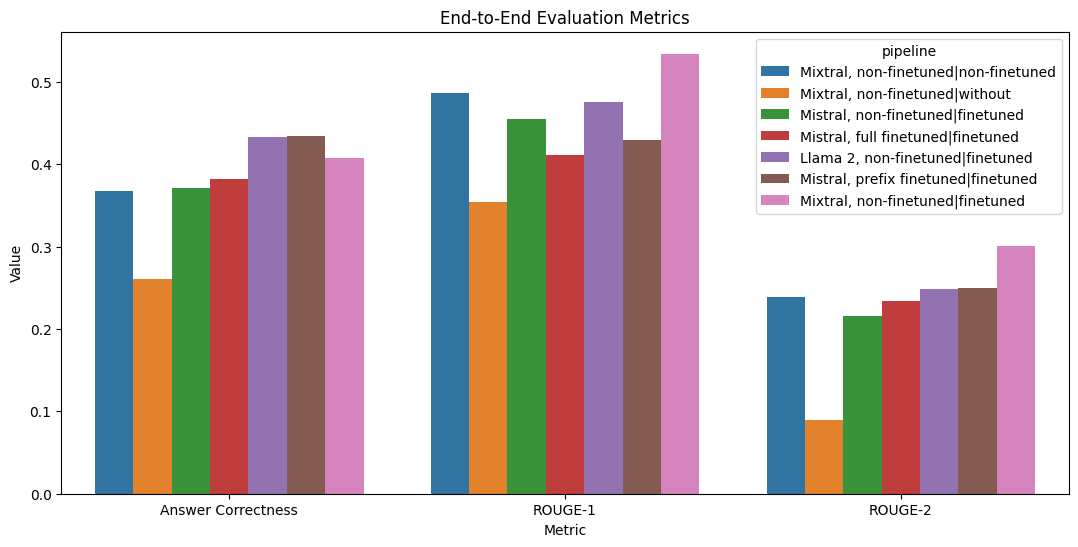

In [127]:
long_df = df.melt(id_vars=['pipeline'], value_vars=['Answer Correctness', 'ROUGE-1', 'ROUGE-2'], 
                  var_name='Metric', value_name='Value')
plt.figure(figsize=(13, 6))
# Plotting
ax = sns.barplot(
    data=long_df,
    x='Metric',
    y='Value',
    hue='pipeline',
    dodge=True  # This ensures bars for different hues don't overlap
)

# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('End-to-End Evaluation Metrics')
plt.show()